In [ ]:
# !pip install pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import mannwhitneyu

# Load datasets, processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Transformation of of 2nd rat datasets**

In [ ]:
path_2= '/content/drive/MyDrive/eeg data/SFN2 total.xlsm'
df_0_2 = pd.read_excel(path_2, sheet_name="00.00")
df_4_2 = pd.read_excel(path_2, sheet_name="04.00")
df_8_2 = pd.read_excel(path_2, sheet_name="08.00")
df_12_2 = pd.read_excel(path_2, sheet_name="12.00")
df_16_2 = pd.read_excel(path_2, sheet_name="16.00")
df_20_2 = pd.read_excel(path_2, sheet_name="20.00")

In [ ]:
df_0_2.shape, df_4_2.shape, df_8_2.shape, df_12_2.shape, df_16_2.shape, df_20_2.shape

((51, 11), (51, 11), (49, 11), (54, 11), (54, 11), (44, 11))

In [ ]:
# Define new column names to replace
new_col_names = ['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
                 'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs',
                 'IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h']

# Update each df from the list
for idx, df in enumerate([df_0_2, df_4_2, df_8_2, df_12_2, df_16_2, df_20_2]):
    if len(new_col_names) == len(df.columns):
        df.columns = new_col_names
        df['IED_dur_per_h'] = df['IEDs_total_dur'] / 2.275
        df['MS_dur_per_h'] = df['MSs_total_dur'] / 2.275
        df['SEI_dur_per_h'] = df['SEIs_total_dur'] / 2.275
        print(df.shape)
        # Remove the last 6 rows from each df
        if idx == 0:
            df_0_2 = df.iloc[:-6]
        elif idx == 1:
            df_4_2 = df.iloc[:-6]
        elif idx == 2:
            df_8_2 = df.iloc[:-6]
        elif idx == 3:
            df_12_2 = df.iloc[:-6]
        elif idx == 4:
            df_16_2 = df.iloc[:-6]
        elif idx == 5:
            df_20_2 = df.iloc[:-6]
    else:
        print(f"The number of new column names does not match the number of columns in dataframe {idx}")


(51, 14)
(51, 14)
(49, 14)
(54, 14)
(54, 14)
(44, 14)


**Transformation of of 3rd rat datasets**

In [ ]:
path_3= '/content/drive/MyDrive/eeg data/SFN3.total.xlsx'
df_0_3 = pd.read_excel(path_3, sheet_name="00.00")
df_4_3 = pd.read_excel(path_3, sheet_name="04.00")
df_8_3 = pd.read_excel(path_3, sheet_name="08.00")
df_12_3 = pd.read_excel(path_3, sheet_name="12.00")
df_16_3 = pd.read_excel(path_3, sheet_name="16.00")
df_20_3 = pd.read_excel(path_3, sheet_name="20.00")

In [ ]:
df_0_3.shape, df_4_3.shape, df_8_3.shape, df_12_3.shape, df_16_3.shape, df_20_3.shape

((31, 8), (30, 8), (30, 8), (31, 8), (30, 8), (29, 8))

In [ ]:
df_0_3.columns

Index(['Unnamed: 0', 'ALL', 'IED', 'Spikes', 'MS', 'ms total', 'SEIZURE',
       'sz total'],
      dtype='object')

In [ ]:
# Define new column names
col_names = ['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
                 'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs']

# Update each df
for idx, df in enumerate([df_0_3, df_4_3, df_8_3, df_12_3, df_16_3, df_20_3]):
    if len(col_names) == len(df.columns):
        df.columns = col_names
        #creating new columns
        df['IED_num_per_h'] = df['Num_IEDs'] / 2.275
        df['MS_num_per_h'] = df['Num_MSs'] / 2.275
        df['SEI_num_per_h'] = df['Num_SEIs'] / 2.275
        df['IED_dur_per_h'] = df['IEDs_total_dur'] / 2.275
        df['MS_dur_per_h'] = df['MSs_total_dur'] / 2.275
        df['SEI_dur_per_h'] = df['SEIs_total_dur'] / 2.275
        print(df.shape)
        # Remove the last 6 rows from the each df
        if idx == 0:
            df_0_3 = df.iloc[:-6]
        elif idx == 1:
            df_4_3 = df.iloc[:-6]
        elif idx == 2:
            df_8_3 = df.iloc[:-6]
        elif idx == 3:
            df_12_3 = df.iloc[:-6]
        elif idx == 4:
            df_16_3 = df.iloc[:-6]
        elif idx == 5:
            df_20_3 = df.iloc[:-6]
    else:
        print(f"The number of new column names does not match the number of columns in dataframe {idx}")

(31, 14)
(30, 14)
(30, 14)
(31, 14)
(30, 14)
(29, 14)


**Transformation of of 4th rat datasets**

In [ ]:
path_4= '/content/drive/MyDrive/eeg data/SFN4 daily.xlsm'
df_0_4 = pd.read_excel(path_4, sheet_name="00.00")
df_4_4 = pd.read_excel(path_4, sheet_name="04.00")
df_8_4 = pd.read_excel(path_4, sheet_name="08.00")
df_12_4 = pd.read_excel(path_4, sheet_name="12.00")
df_16_4 = pd.read_excel(path_4, sheet_name="16.00")
df_20_4 = pd.read_excel(path_4, sheet_name="20.00")

In [ ]:
df_0_4.shape, df_4_4.shape, df_8_4.shape, df_12_4.shape, df_16_4.shape, df_20_4.shape

((41, 8), (40, 8), (43, 8), (45, 8), (45, 8), (40, 8))

In [ ]:
df_0_4.columns

Index(['Unnamed: 0', 'ALL', 'IED', 'Spikes', 'MS', 'ms total', 'SEIZURE',
       'sz total'],
      dtype='object')

In [ ]:
# Define new column names
col_names = ['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
                 'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs']

# Update each df
for idx, df in enumerate([df_0_4, df_4_4, df_8_4, df_12_4, df_16_4, df_20_4]):
    if len(col_names) == len(df.columns):
        df.columns = col_names
        #creating new columns
        df['IED_num_per_h'] = df['Num_IEDs'] / 2.275
        df['MS_num_per_h'] = df['Num_MSs'] / 2.275
        df['SEI_num_per_h'] = df['Num_SEIs'] / 2.275
        df['IED_dur_per_h'] = df['IEDs_total_dur'] / 2.275
        df['MS_dur_per_h'] = df['MSs_total_dur'] / 2.275
        df['SEI_dur_per_h'] = df['SEIs_total_dur'] / 2.275
        print(df.shape)
        # Remove the last 6 rows from the each df
        if idx == 0:
            df_0_4 = df.iloc[:-6]
        elif idx == 1:
            df_4_4 = df.iloc[:-6]
        elif idx == 2:
            df_8_4 = df.iloc[:-6]
        elif idx == 3:
            df_12_4 = df.iloc[:-6]
        elif idx == 4:
            df_16_4 = df.iloc[:-6]
        elif idx == 5:
            df_20_4 = df.iloc[:-6]
    else:
        print(f"The number of new column names does not match the number of columns in dataframe {idx}")

(41, 14)
(40, 14)
(43, 14)
(45, 14)
(45, 14)
(40, 14)


**Transformation of of 5th rat datasets**

In [ ]:
path_5= '/content/drive/MyDrive/eeg data/SFN5 daily.xlsm'
df_0_5 = pd.read_excel(path_5, sheet_name="00.00")
df_4_5 = pd.read_excel(path_5, sheet_name="04.00")
df_8_5 = pd.read_excel(path_5, sheet_name="08.00")
df_12_5 = pd.read_excel(path_5, sheet_name="12.00")
df_16_5 = pd.read_excel(path_5, sheet_name="16.00")
df_20_5 = pd.read_excel(path_5, sheet_name="20.00")

In [ ]:
df_0_5.shape, df_4_5.shape, df_8_5.shape, df_12_5.shape, df_16_5.shape, df_20_5.shape

((34, 8), (37, 8), (37, 8), (43, 8), (40, 8), (39, 8))

In [ ]:
df_0_5.columns

Index(['Unnamed: 0', 'ALL', 'IED', 'Spikes', 'MS', 'ms total', 'SEIZURE',
       'sz total'],
      dtype='object')

In [ ]:
# Define new column names
col_names = ['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
                 'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs']

# Update each df
for idx, df in enumerate([df_0_5, df_4_5, df_8_5, df_12_5, df_16_5, df_20_5]):
    if len(col_names) == len(df.columns):
        df.columns = col_names
        #Creating new columns
        df['IED_num_per_h'] = df['Num_IEDs'] / 2.275
        df['MS_num_per_h'] = df['Num_MSs'] / 2.275
        df['SEI_num_per_h'] = df['Num_SEIs'] / 2.275
        df['IED_dur_per_h'] = df['IEDs_total_dur'] / 2.275
        df['MS_dur_per_h'] = df['MSs_total_dur'] / 2.275
        df['SEI_dur_per_h'] = df['SEIs_total_dur'] / 2.275
        print(df.shape)
        # Remove the last 6 rows from the each df
        if idx == 0:
            df_0_5 = df.iloc[:-6]
        elif idx == 1:
            df_4_5 = df.iloc[:-6]
        elif idx == 2:
            df_8_5 = df.iloc[:-6]
        elif idx == 3:
            df_12_5 = df.iloc[:-6]
        elif idx == 4:
            df_16_5 = df.iloc[:-6]
        elif idx == 5:
            df_20_5 = df.iloc[:-6]
    else:
        print(f"The number of new column names does not match the number of columns in dataframe {idx}")

(34, 14)
(37, 14)
(37, 14)
(43, 14)
(40, 14)
(39, 14)


**Transformation of of 6th rat datasets**

In [ ]:
path_6= '/content/drive/MyDrive/eeg data/SFN6 daily.xlsx'
df_0_6 = pd.read_excel(path_5, sheet_name="00.00")
df_4_6 = pd.read_excel(path_6, sheet_name="04")
df_8_6 = pd.read_excel(path_5, sheet_name="08.00")
df_12_6 = pd.read_excel(path_6, sheet_name="12")
df_16_6 = pd.read_excel(path_5, sheet_name="16.00")
df_20_6 = pd.read_excel(path_5, sheet_name="20.00")

In [ ]:
df_0_6.shape, df_4_6.shape, df_8_6.shape, df_12_6.shape, df_16_6.shape, df_20_6.shape

((34, 8), (16, 8), (37, 8), (16, 8), (40, 8), (39, 8))

In [ ]:
# Define new column names
col_names = ['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
                 'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs']

# Update each df
for idx, df in enumerate([df_0_6, df_4_6, df_8_6, df_12_6, df_16_6, df_20_6]):
    if len(col_names) == len(df.columns):
        df.columns = col_names
        # Creating new columns
        df['IED_num_per_h'] = df['Num_IEDs'] / 2.275
        df['MS_num_per_h'] = df['Num_MSs'] / 2.275
        df['SEI_num_per_h'] = df['Num_SEIs'] / 2.275
        df['IED_dur_per_h'] = df['IEDs_total_dur'] / 2.275
        df['MS_dur_per_h'] = df['MSs_total_dur'] / 2.275
        df['SEI_dur_per_h'] = df['SEIs_total_dur'] / 2.275
         # Remove the last 6 rows from the each df
        if idx == 0:
            df_0_6 = df.iloc[:-24]
        elif idx == 1:
            df_4_6 = df.iloc[:-6]
        elif idx == 2:
            df_8_6 = df.iloc[:-27]
        elif idx == 3:
            df_12_6 = df.iloc[:-6]
        elif idx == 4:
            df_16_6 = df.iloc[:-30]
        elif idx == 5:
            df_20_6 = df.iloc[:-29]


    else:
        print(f"The number of new column names does not match the number of columns in dataframe {idx}")
df_0_6.shape, df_4_6.shape, df_8_6.shape, df_12_6.shape, df_16_6.shape, df_20_6.shape

((10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14))

# Creating and preprocessing dataset with data of PILO group in daytime intervals and its visualisation

**Making dataset with data of PILO group in daytime intervals**

In [ ]:
df_0_pilo= pd.concat ([df_0_2, df_0_3, df_0_4], ignore_index=True)
df_4_pilo= pd.concat ([df_4_2, df_4_3, df_4_4], ignore_index=True)
df_8_pilo= pd.concat ([df_8_2, df_8_3, df_8_4], ignore_index=True)
df_12_pilo= pd.concat ([df_12_2, df_12_3, df_12_4], ignore_index=True)
df_16_pilo= pd.concat ([df_16_2, df_16_3, df_16_4], ignore_index=True)
df_20_pilo= pd.concat ([df_20_2, df_20_3, df_20_4], ignore_index=True)


In [ ]:
# Define the time intervals
time_intervals = ['0-4', '4-8', '8-12', '12-16', '16-18', '18-20']

# List of DataFrames and their corresponding time intervals
dfs_pilo = [df_0_pilo, df_4_pilo, df_8_pilo, df_12_pilo, df_16_pilo, df_20_pilo]

# Add the "Time_interval" column to each DataFrame and concatenate
df_pilo = pd.concat(
    [df.assign(Time_interval=interval) for df, interval in zip(dfs_pilo, time_intervals)],
    ignore_index=True
)

# Check the structure of the new DataFrame
df_pilo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Example_names   630 non-null    object 
 1   Total_s         630 non-null    float64
 2   IEDs_total_dur  630 non-null    float64
 3   Num_IEDs        630 non-null    float64
 4   MSs_total_dur   630 non-null    float64
 5   Num_MSs         630 non-null    float64
 6   SEIs_total_dur  630 non-null    float64
 7   Num_SEIs        630 non-null    float64
 8   IED_num_per_h   630 non-null    float64
 9   MS_num_per_h    630 non-null    float64
 10  SEI_num_per_h   630 non-null    float64
 11  IED_dur_per_h   630 non-null    float64
 12  MS_dur_per_h    630 non-null    float64
 13  SEI_dur_per_h   630 non-null    float64
 14  Time_interval   630 non-null    object 
dtypes: float64(13), object(2)
memory usage: 74.0+ KB


In [ ]:
columns= df_pilo[['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h']].columns
columns

Index(['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h'],
      dtype='object')

In [ ]:
# checking time_intervals in in df_2
time_intervals= df_pilo['Time_interval'].nunique()
time_intervals

6

In [ ]:
df_pilo[columns].describe()

,IED_num_per_h,MS_num_per_h,SEI_num_per_h,IED_dur_per_h,MS_dur_per_h,SEI_dur_per_h
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,2.678454,2.321498,8.648945,5.449280,11.085017,172.916309
std,3.236838,1.802297,5.618862,5.694563,8.166511,88.946724
min,0.000000,0.000000,0.250000,0.000000,0.000000,8.527473
25%,0.500000,0.879121,4.421703,1.758242,5.065934,103.824176
50%,1.318681,1.758242,7.250000,3.560440,8.681319,163.934066
75%,3.516484,3.250000,11.428571,7.109890,15.153846,229.912088
max,23.250000,9.670330,34.725275,41.758242,48.879121,483.516484


**Visualisation data from PILO group in daytime intervals**

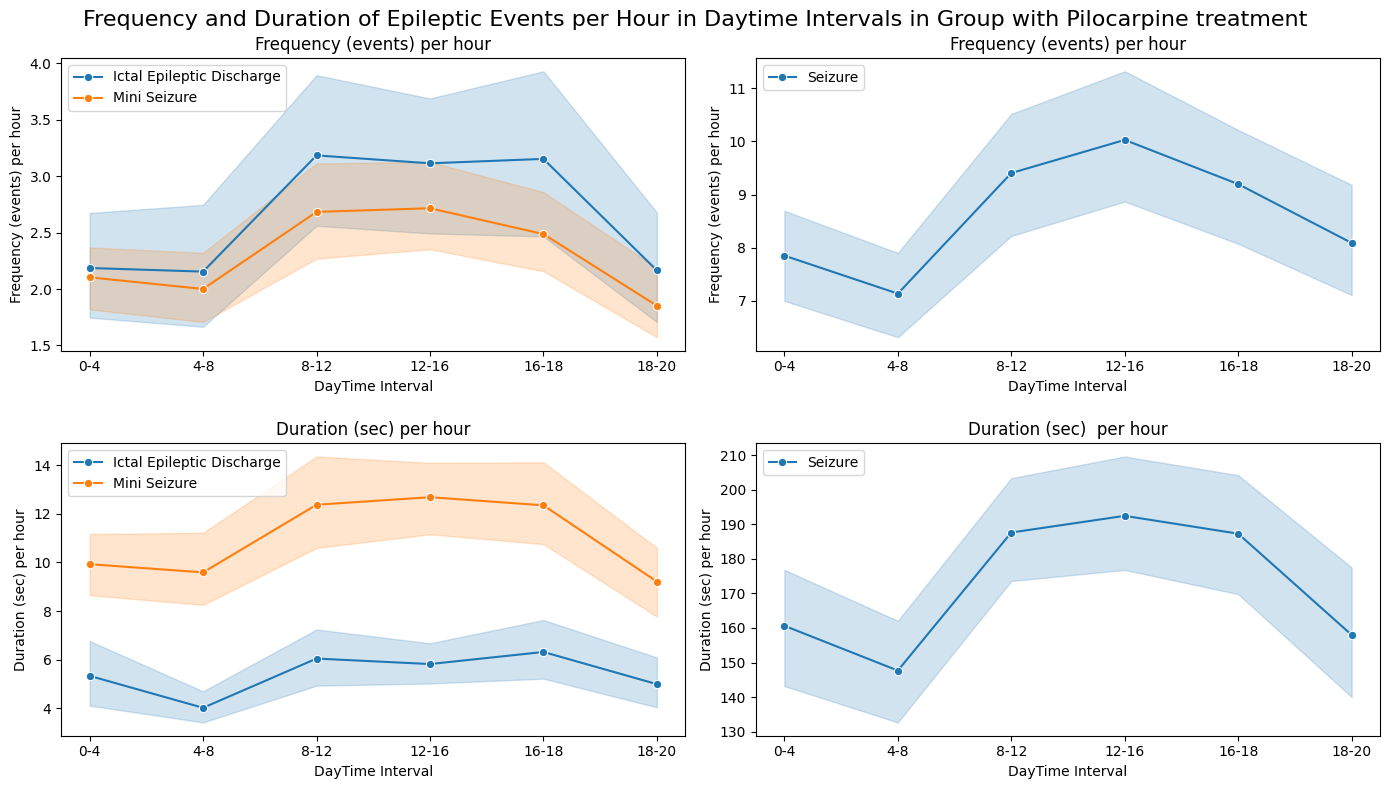

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Frequency and Duration of Epileptic Events per Hour in Daytime Intervals in Group with Pilocarpine treatment', fontsize=16)
sns.lineplot(
    data=df_pilo.melt(id_vars='Time_interval', value_vars=['IED_num_per_h', 'MS_num_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[0,0]
)
axes[0,0].set_title('Frequency (events) per hour')
axes[0,0].set_xlabel('DayTime Interval')
axes[0,0].set_ylabel('Frequency (events) per hour')
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0,0].legend(handles=handles, labels=['Ictal Epileptic Discharge', 'Mini Seizure'], loc= 'upper left')


sns.lineplot(
    data=df_pilo.melt(id_vars='Time_interval', value_vars=['SEI_num_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[0,1]
)
axes[0,1].set_title('Frequency (events) per hour')
axes[0,1].set_xlabel('DayTime Interval')
axes[0,1].set_ylabel('Frequency (events) per hour')
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0,1].legend(handles=handles, labels=['Seizure'], loc= 'upper left')

sns.lineplot(
    data=df_pilo.melt(id_vars='Time_interval', value_vars=['IED_dur_per_h', 'MS_dur_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[1,0]
)
axes[1,0].set_title('Duration (sec) per hour')
axes[1,0].set_xlabel('DayTime Interval')
axes[1,0].set_ylabel('Duration (sec) per hour')
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1,0].legend(handles=handles, labels=['Ictal Epileptic Discharge', 'Mini Seizure'], loc= 'upper left')

sns.lineplot(
    data=df_pilo.melt(id_vars='Time_interval', value_vars=['SEI_dur_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[1,1]
)
axes[1,1].set_title('Duration (sec)  per hour')
axes[1,1].set_xlabel('DayTime Interval')
axes[1,1].set_ylabel('Duration (sec) per hour')
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1,1].legend(handles=handles, labels=['Seizure'], loc= 'upper left')


plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.subplots_adjust(top=0.92)
plt.savefig('Freq_ Dur_Ep_Events_Daytime_Interv_Pilo.png')
plt.show()

# Making and visualisation dataset with data of PILO+SFN group in daytime intervals

**Making dataset with data of PILO+SFN group in daytime intervals**

In [ ]:
df_0_sfn= pd.concat ([df_0_5, df_0_6], ignore_index=True)
df_4_sfn= pd.concat ([df_4_5, df_4_6], ignore_index=True)
df_8_sfn= pd.concat ([df_8_5, df_8_6], ignore_index=True)
df_12_sfn= pd.concat ([df_12_5, df_12_6], ignore_index=True)
df_16_sfn= pd.concat ([df_16_5, df_16_6], ignore_index=True)
df_20_sfn= pd.concat ([df_20_5, df_20_6], ignore_index=True)


In [ ]:
# Define the time intervals
time_intervals = ['0-4', '4-8', '8-12', '12-16', '16-18', '18-20']

# List of DataFrames and their corresponding time intervals
dfs_sfn = [df_0_sfn, df_4_sfn, df_8_sfn, df_12_sfn, df_16_sfn, df_20_sfn]

# Add the "Time_interval" column to each DataFrame and concatenate
df_sfn = pd.concat(
    [df.assign(Time_interval=interval) for df, interval in zip(dfs_sfn, time_intervals)],
    ignore_index=True
)

# Check the structure of the new DataFrame
df_sfn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Example_names   254 non-null    object 
 1   Total_s         254 non-null    float64
 2   IEDs_total_dur  254 non-null    float64
 3   Num_IEDs        254 non-null    float64
 4   MSs_total_dur   254 non-null    float64
 5   Num_MSs         254 non-null    float64
 6   SEIs_total_dur  254 non-null    float64
 7   Num_SEIs        254 non-null    float64
 8   IED_num_per_h   254 non-null    float64
 9   MS_num_per_h    254 non-null    float64
 10  SEI_num_per_h   254 non-null    float64
 11  IED_dur_per_h   254 non-null    float64
 12  MS_dur_per_h    254 non-null    float64
 13  SEI_dur_per_h   254 non-null    float64
 14  Time_interval   254 non-null    object 
dtypes: float64(13), object(2)
memory usage: 29.9+ KB


In [ ]:
# checking time_intervals in in df_2
intervals= df_sfn['Time_interval'].nunique()
intervals

6

In [ ]:
df_sfn.columns

Index(['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
       'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs',
       'IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h', 'Time_interval'],
      dtype='object')

In [ ]:
df_sfn[columns].describe()

,IED_num_per_h,MS_num_per_h,SEI_num_per_h,IED_dur_per_h,MS_dur_per_h,SEI_dur_per_h
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,2.720429,2.980012,9.673791,4.640132,11.353985,168.248611
std,3.111468,2.194090,4.643653,4.793081,9.110192,79.696901
min,0.000000,0.000000,1.318681,0.000000,0.000000,17.230769
25%,0.879121,1.318681,6.153846,1.472527,4.890110,100.813187
50%,2.197802,2.637363,9.670330,3.604396,9.802198,163.758242
75%,3.516484,3.956044,12.307692,6.241758,14.945055,227.065934
max,21.978022,11.868132,26.373626,33.406593,58.813187,355.542857


**Visualisation data from PILO+SFN group in daytime intervals**

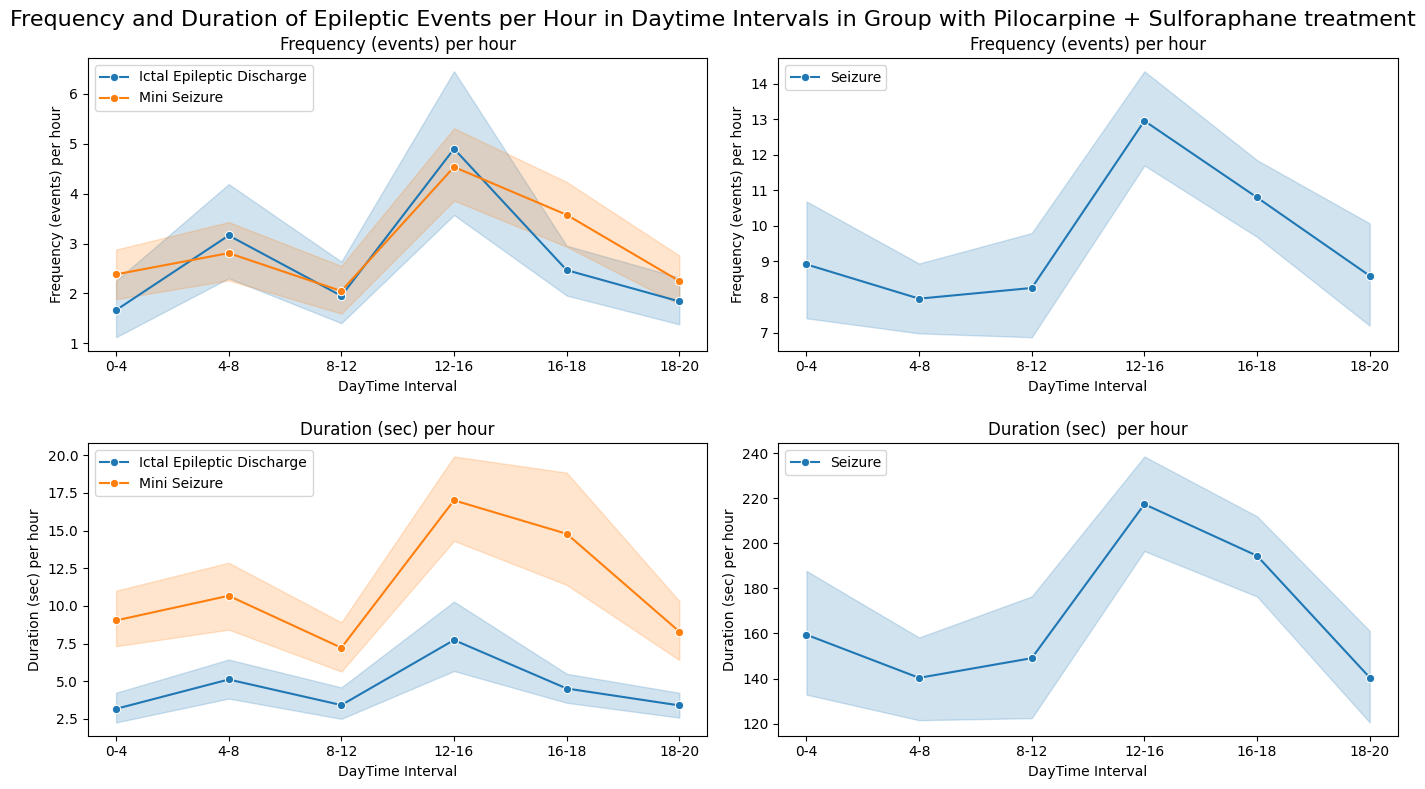

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Frequency and Duration of Epileptic Events per Hour in Daytime Intervals in Group with Pilocarpine + Sulforaphane treatment', fontsize=16)
sns.lineplot(
    data=df_sfn.melt(id_vars='Time_interval', value_vars=['IED_num_per_h', 'MS_num_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[0,0]
)
axes[0,0].set_title('Frequency (events) per hour')
axes[0,0].set_xlabel('DayTime Interval')
axes[0,0].set_ylabel('Frequency (events) per hour')
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0,0].legend(handles=handles, labels=['Ictal Epileptic Discharge', 'Mini Seizure'], loc= 'upper left')


sns.lineplot(
    data=df_sfn.melt(id_vars='Time_interval', value_vars=['SEI_num_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[0,1]
)
axes[0,1].set_title('Frequency (events) per hour')
axes[0,1].set_xlabel('DayTime Interval')
axes[0,1].set_ylabel('Frequency (events) per hour')
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0,1].legend(handles=handles, labels=['Seizure'], loc= 'upper left')

sns.lineplot(
    data=df_sfn.melt(id_vars='Time_interval', value_vars=['IED_dur_per_h', 'MS_dur_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[1,0]
)
axes[1,0].set_title('Duration (sec) per hour')
axes[1,0].set_xlabel('DayTime Interval')
axes[1,0].set_ylabel('Duration (sec) per hour')
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1,0].legend(handles=handles, labels=['Ictal Epileptic Discharge', 'Mini Seizure'], loc= 'upper left')

sns.lineplot(
    data=df_sfn.melt(id_vars='Time_interval', value_vars=['SEI_dur_per_h'],
                   var_name='Type', value_name='Value'),
    x='Time_interval', y='Value', hue='Type', marker='o', ax=axes[1,1]
)
axes[1,1].set_title('Duration (sec)  per hour')
axes[1,1].set_xlabel('DayTime Interval')
axes[1,1].set_ylabel('Duration (sec) per hour')
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1,1].legend(handles=handles, labels=['Seizure'], loc= 'upper left')


plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.subplots_adjust(top=0.92)
plt.savefig('Freq_ Dur_Ep_Events_Daytime_Interv_Pilo+SFN.png')
plt.show()

In [ ]:
# Saving DF_SFN on Google Drive
file_path = '/content/drive/MyDrive/eeg data/df_sfn_freq_dur.csv'
df_sfn.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/df_sfn_freq_dur.csv


In [ ]:
# Saving DF_PILO on Google Drive
file_path = '/content/drive/MyDrive/eeg data/df_pilo_freq_dur.csv'
df_pilo.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/df_pilo_freq_dur.csv


# Comparison between SFN+PILO and PILO

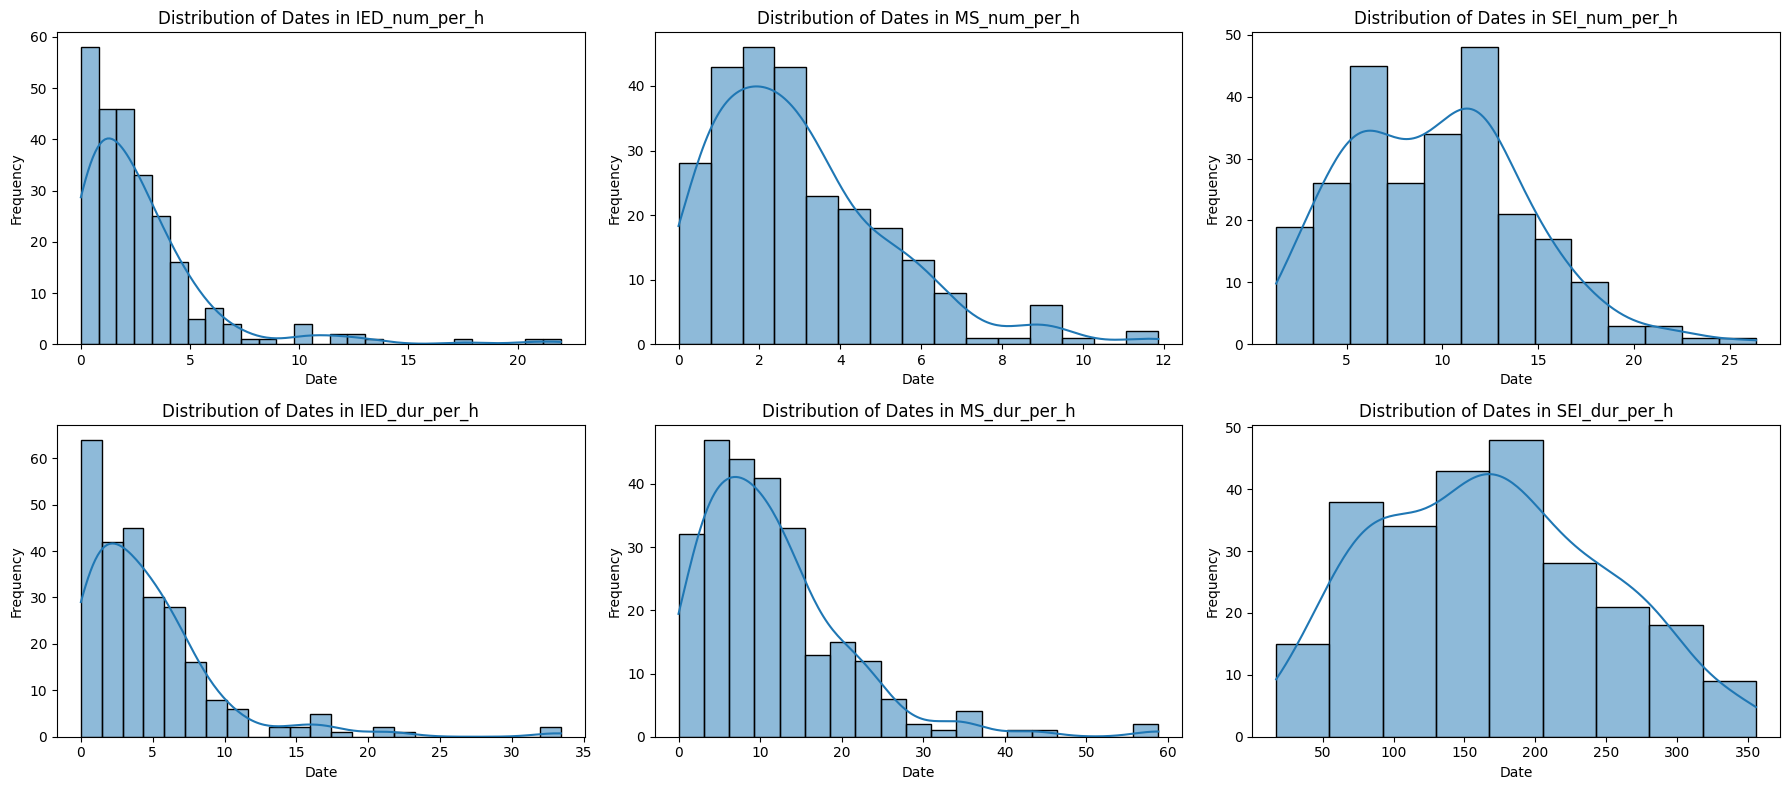

In [ ]:
# Data SFN+PILO treatment dictribution visualization
columns = ['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h', 'MS_dur_per_h', 'SEI_dur_per_h']
# Setting histograms parameters
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df_sfn[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of Dates in {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



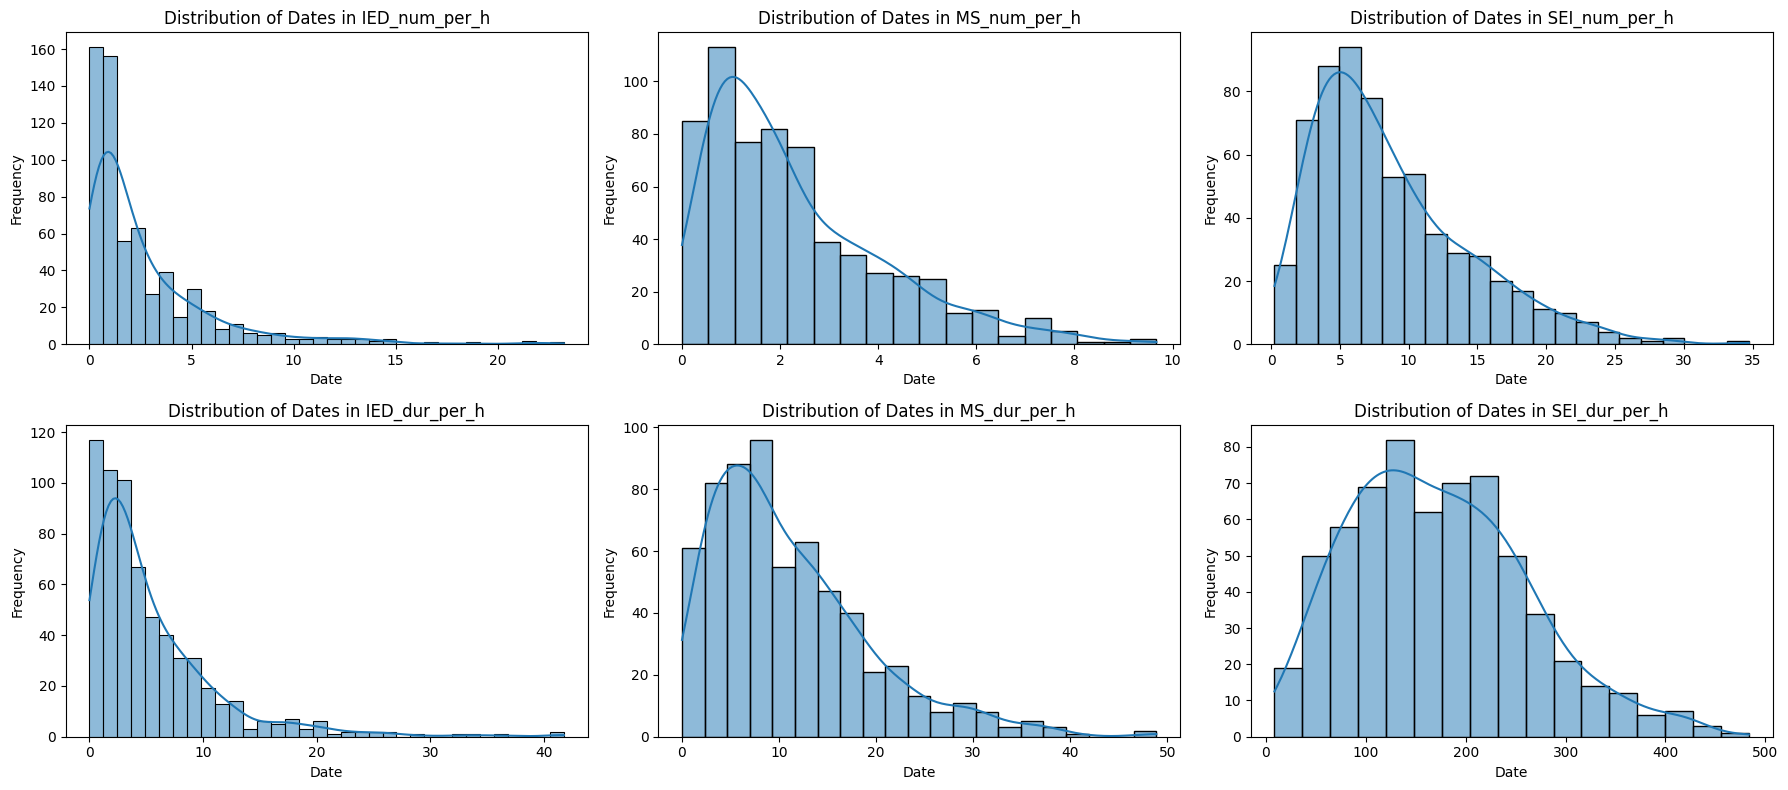

In [ ]:
# Data SPILO treatment dictribution visualization
columns = ['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h', 'MS_dur_per_h', 'SEI_dur_per_h']
# Setting histograms parameters
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df_pilo[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of Dates in {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
time_intervals

['0-4', '4-8', '8-12', '12-16', '16-18', '18-20']

In [ ]:
df_sfn.columns

Index(['Example_names', 'Total_s', 'IEDs_total_dur', 'Num_IEDs',
       'MSs_total_dur', 'Num_MSs', 'SEIs_total_dur', 'Num_SEIs',
       'IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h', 'Time_interval'],
      dtype='object')

In [ ]:
# Calculation median value
median_df_sfn = df_sfn.groupby('Time_interval')[columns].median().reset_index()
median_df_pilo = df_pilo.groupby('Time_interval')[columns].median().reset_index()
print('Median values of frequency and duration (per hour) epileptic events for group with PILO+SFN treatment:\n')
print("Median for Frequency (per hour):")
print(median_df_sfn[['Time_interval','IED_num_per_h','MS_num_per_h','SEI_num_per_h']])
print("\nMedian for Duration (per hour):")
print(median_df_sfn[['Time_interval','IED_dur_per_h','MS_dur_per_h','SEI_dur_per_h']])

Median values of frequency and duration (per hour) epileptic events for group with PILO+SFN treatment:

Median for Frequency (per hour):
  Time_interval  IED_num_per_h  MS_num_per_h  SEI_num_per_h
0           0-4       0.879121      1.758242       8.571429
1         12-16       3.076923      3.956044      12.747253
2         16-18       2.417582      3.076923      11.428571
3         18-20       1.318681      2.197802       7.912088
4           4-8       2.637363      2.637363       7.472527
5          8-12       1.758242      1.758242       8.791209

Median for Duration (per hour):
  Time_interval  IED_dur_per_h  MS_dur_per_h  SEI_dur_per_h
0           0-4       1.978022      6.813187     161.318681
1         12-16       5.318681     15.604396     219.648352
2         16-18       4.307692     11.846154     205.978022
3         18-20       3.296703      8.131868     116.087912
4           4-8       4.659341      9.978022     139.560440
5          8-12       3.296703      6.813187     1

In [ ]:
print('Median values of frequency and duration (per hour) epileptic events for group with PILO treatment:\n')
print("Median for Frequency (per hour):")
print(median_df_pilo[['Time_interval','IED_num_per_h','MS_num_per_h','SEI_num_per_h']])
print("\nMedian for Duration (per hour):")
print(median_df_pilo[['Time_interval','IED_dur_per_h','MS_dur_per_h','SEI_dur_per_h']])

Median values of frequency and duration (per hour) epileptic events for group with PILO treatment:

Median for Frequency (per hour):
  Time_interval  IED_num_per_h  MS_num_per_h  SEI_num_per_h
0           0-4       1.318681      1.758242       7.032967
1         12-16       1.758242      2.197802       7.472527
2         16-18       1.500000      1.758242       7.912088
3         18-20       1.318681      1.318681       6.593407
4           4-8       1.250000      1.750000       6.593407
5          8-12       1.758242      1.758242       7.472527

Median for Duration (per hour):
  Time_interval  IED_dur_per_h  MS_dur_per_h  SEI_dur_per_h
0           0-4       3.384615      9.010989     154.109890
1         12-16       4.373626     11.494505     191.956044
2         16-18       3.956044      9.626374     178.637363
3         18-20       3.076923      7.164835     147.208791
4           4-8       3.076923      8.131868     151.208791
5          8-12       4.043956      9.142857     179.7

In [ ]:
# Creating datasets with a set columns
df_sfn_lim= df_sfn[['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h','Time_interval']]
df_pilo_lim= df_pilo[['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h', 'IED_dur_per_h',
       'MS_dur_per_h', 'SEI_dur_per_h','Time_interval']]

In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Initialize a list to store the results with medians
results = []

# List of columns to compare
columns = ['IED_num_per_h', 'MS_num_per_h', 'SEI_num_per_h',
           'IED_dur_per_h', 'MS_dur_per_h', 'SEI_dur_per_h']

# Get unique time intervals that are present in both datasets
time_intervals = set(df_sfn_lim['Time_interval']).intersection(df_pilo_lim['Time_interval'])

# Loop through each column and time interval
for col in columns:
    for interval in time_intervals:
        # Select data for the current time interval in each dataset
        data_sfn = df_sfn_lim[df_sfn_lim['Time_interval'] == interval][col]
        data_pilo = df_pilo_lim[df_pilo_lim['Time_interval'] == interval][col]

        # Calculate medians
        median_sfn = data_sfn.median()
        median_pilo = data_pilo.median()

        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(data_sfn, data_pilo, alternative='two-sided')

        # Append the results with medians to the list
        results.append({
            'Column': col,
            'Time_Interval': interval,
            'Median_SFN': median_sfn,
            'Median_PILO': median_pilo,
            'U_statistic': stat,
            'p_value': p_value
        })

# Convert the results list to a DataFrame for easy viewing
results_df = pd.DataFrame(results).round(3)

# Filter for significant results
results_df_sign_p = results_df[results_df['p_value'] < 0.05].reset_index(drop=True)

# Display the results
results_df_sign_p
results_df_sign_p.to_excel('results_df_sign_p.xlsx', index=False)

In [ ]:
results_df_sign_p

,Column,Time_Interval,Median_SFN,Median_PILO,U_statistic,p_value
0,IED_num_per_h,4-8,2.637,1.250,2677.5,0.012
1,IED_num_per_h,12-16,3.077,1.758,3203.0,0.031
2,MS_num_per_h,16-18,3.077,1.758,3201.5,0.003
3,MS_num_per_h,4-8,2.637,1.750,2651.0,0.017
4,MS_num_per_h,12-16,3.956,2.198,3802.5,0.000
5,SEI_num_per_h,16-18,11.429,7.912,3153.0,0.005
6,SEI_num_per_h,12-16,12.747,7.473,3573.5,0.000
7,IED_dur_per_h,8-12,3.297,4.044,1530.0,0.008
8,MS_dur_per_h,8-12,6.813,9.143,1469.5,0.004
9,MS_dur_per_h,12-16,15.604,11.495,3365.5,0.006


**Summary of Significant Difference between PILO+SFN vs PILO treatment:**

Overall, PILO+SFN generally exhibits a higher frequency of IED, MS, and SEI events across several intervals ('0-4', '12-16' for IED and Mini Seizures, and '12-16' '16-18' for Seizures).

PILO often shows longer durations for IED and SEI events during the 8-12 hour intervals. However, in the interval '12-16' higher values were in PILO+SFN group.

These patterns suggest that while PILO might provoke more frequent occurrences of these events, SFN may influence the duration of events, potentially indicating differing mechanisms of action.

**OVERALL SUMMARY**

According to the results obtained, the lowest rates of frequency and duration of epileptic events were observed in the 4-8 hour time range, while the highest rates were found in the 12-16 hour time range. This justifies the selection of these time ranges for further EEG data analysis.

In these time ranges, significant differences between the groups were found in the frequency of epileptic events, while the duration of epileptic events shows less sensitivity to treatment with SFN (Significant prevalence was found in the '12-16' time intervals regarding Mini Seizure epileptic events with PILO+SFN treatment).